In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train= pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
train1=train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [7]:
train1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

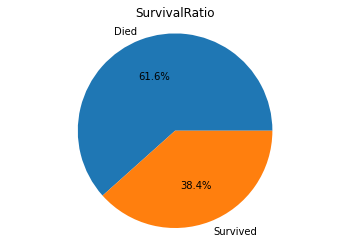

In [8]:
fig, ax = plt.subplots()
sizes = [549,342]
labels = ['Died','Survived']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal') 
ax.set_title('SurvivalRatio')
plt.show()

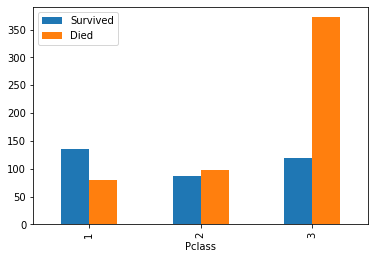

In [9]:
train['Died'] = 1 - train['Survived']
train.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind = 'bar')
figsize = (12,7)

In [10]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
train1.Sex=train1.Sex.map({'female':0, 'male':1})
train1.Embarked=train1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [13]:
Male_mean = train1[train1['Sex']==1]['Age'].mean()
train1.loc[(train1.Age.isnull()) & (train1['Sex']==1),'Age']=Male_mean
Female_mean = train1[train1['Sex']==0]['Age'].mean()
train1.loc[(train1.Age.isnull()) & (train1['Sex']==0),'Age']=Female_mean

In [14]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
train1.dropna(inplace=True)

In [16]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
train1.Age = (train1.Age-min(train1.Age))/(max(train1.Age)-min(train1.Age))
train1.Fare = (train1.Fare-min(train1.Fare))/(max(train1.Fare)-min(train1.Fare))
train1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


In [18]:
X_train = train1.drop(['Survived'], axis=1)
Y_train = train1.Survived

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain,xtest,ytrain,ytest=train_test_split(X_train, Y_train, test_size=0.2, random_state=10)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,30):
    neigh = KNeighborsRegressor(n_neighbors=i).fit(xtrain, ytrain)
    neigh.fit(xtrain, ytrain)
    ypred=neigh.predict(xtest)
    final = np.round(ypred)
    print('n=',i,':',accuracy_score(final, list(ytest)))

n= 1 : 0.7584269662921348
n= 2 : 0.8258426966292135
n= 3 : 0.8033707865168539
n= 4 : 0.8426966292134831
n= 5 : 0.8426966292134831
n= 6 : 0.8314606741573034
n= 7 : 0.8426966292134831
n= 8 : 0.8202247191011236
n= 9 : 0.8314606741573034
n= 10 : 0.8370786516853933
n= 11 : 0.8426966292134831
n= 12 : 0.8370786516853933
n= 13 : 0.8426966292134831
n= 14 : 0.8426966292134831
n= 15 : 0.848314606741573
n= 16 : 0.8539325842696629
n= 17 : 0.8426966292134831
n= 18 : 0.8426966292134831
n= 19 : 0.8314606741573034
n= 20 : 0.848314606741573
n= 21 : 0.8426966292134831
n= 22 : 0.8426966292134831
n= 23 : 0.8314606741573034
n= 24 : 0.848314606741573
n= 25 : 0.8370786516853933
n= 26 : 0.848314606741573
n= 27 : 0.8370786516853933
n= 28 : 0.8370786516853933
n= 29 : 0.8314606741573034


In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=35).fit(xtrain,ytrain)
ypred=forest_model.predict(xtest)
final = np.round(ypred)
accuracy_score(final, list(ytest))


0.8651685393258427

In [22]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=100).fit(xtrain, ytrain)
LR.fit(xtrain, ytrain)
ypred=LR.predict(xtest)
final = np.round(ypred)
accuracy_score(final, list(ytest))

0.8202247191011236

# Using Model on Test Data

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
test1 = test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [25]:
test1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [26]:
test1.Sex=test1.Sex.map({'female':0, 'male':1})
test1.Embarked=test1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [27]:
Male_mean = test1[test1['Sex']==1]['Age'].mean()
test1.loc[(test1.Age.isnull()) & (test1['Sex']==1),'Age']=Male_mean
Female_mean = test1[test1['Sex']==0]['Age'].mean()
test1.loc[(test1.Age.isnull()) & (test1['Sex']==0),'Age']=Female_mean
test1['Fare']=test1['Fare'].fillna(test1['Fare'].mean())


In [28]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
test1.Age = (test1.Age-min(test1.Age))/(max(test1.Age)-min(test1.Age))
test1.Fare = (test1.Fare-min(test1.Fare))/(max(test1.Fare)-min(test1.Fare))
test1.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540
std,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


In [30]:
prediction = LR.predict(test1)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [32]:
submission.to_csv('submission.csv', index=False)